# STAT 207 Homework 5 [25 points]

## Inference Procedures

Due: Thursday, February 27, end of day (11:59 pm CT)

Late submissions accepted until Friday, February 28 at noon

<hr>

## Imports 

Run the following code cell to import the necessary packages into the file.  You may import additional packages, as needed for this assignment.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import statsmodels.formula.api as smf

## Case Study: Colleges and Universities

We will use a random sample of post-secondary education facilities (colleges & universities) from the United States, including Puerto Rico & other US territories.  The **colleges.csv** file contains a random sample of 135 post-secondary education facilities from the US.  This data originally were obtained from: https://www.kaggle.com/yamqwe/colleges-and-universitiese
although the specific data is no longer available through this link.

We will focus on a few variables in particular:

- the categorization of the school (`NAICS_DESC`)
- the total number of students enrolled (`TOT_ENROLL`)

## 1. Read and prepare the data [1 point] 

**a)** You should read in the data from the **colleges.csv** file.

In [7]:
df = pd.read_csv("colleges.csv")
df

,Unnamed: 0,X,Y,FID,IPEDSID,NAME,ADDRESS,ADDRESS2,CITY,STATE,...,ALIAS,SIZE_SET,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,HOUSING,DORM_CAP,TOT_EMPLOY,SHELTER_ID
0,3003,-73.490213,40.759564,5268,189459,Briarcliffe College,1055 Stewart Ave,NOT AVAILABLE,Bethpage,NY,...,NOT AVAILABLE,9,2,440,1226,1666,2,0,356,NOT AVAILABLE
1,2832,-78.332293,35.501418,5097,198774,Johnston Community College,245 College Road,NOT AVAILABLE,Smithfield,NC,...,NOT AVAILABLE,3,2,2141,2075,4216,2,0,697,NOT AVAILABLE
2,3811,-101.891915,33.589284,1076,229337,Texas Tech University Health Sciences Center,3601 4th Street,NOT AVAILABLE,Lubbock,TX,...,NOT AVAILABLE,-2,2,916,3475,4391,2,0,5574,NOT AVAILABLE
3,5143,-85.196213,34.258192,4408,140988,Shorter University,315 Shorter Ave,NOT AVAILABLE,Rome,GA,...,Shorter,11,2,130,1378,1508,1,668,319,NOT AVAILABLE
4,7008,-83.892154,39.798614,2273,440138,Antioch University-System Administration,900 Dayton Street,NOT AVAILABLE,Yellow Springs,OH,...,NOT AVAILABLE,-3,-2,0,0,0,-2,0,89,NOT AVAILABLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,1783,-119.732643,36.726017,6048,114813,Fresno Pacific University,1717 S Chestnut Ave,NOT AVAILABLE,Fresno,CA,...,NOT AVAILABLE,10,2,820,2512,3332,1,518,675,NOT AVAILABLE
131,5713,-96.165425,43.083651,4978,153250,Dordt College,498 4th Ave NE,NOT AVAILABLE,Sioux Center,IA,...,NOT AVAILABLE,11,2,56,1344,1400,1,1258,227,NOT AVAILABLE
132,1751,-110.996994,32.296733,6016,105163,ITT Technical Institute-Tucson,1455 W. River Rd,NOT AVAILABLE,Tucson,AZ,...,NOT AVAILABLE,-2,1,188,341,529,2,0,61,NOT AVAILABLE
133,3956,-84.192006,39.695052,1221,203544,Kettering College,3737 Southern Blvd,NOT AVAILABLE,Kettering,OH,...,NOT AVAILABLE,-2,1,417,564,981,1,120,103,NOT AVAILABLE


**b)** We are interested in making statements about junior colleges, colleges, universities, and professional schools.  Update our data so that this can be accomplished.  That is, be sure that all other types of post-secondary schools are removed from the data.

In [8]:
df['NAICS_DESC'].unique()

array(['Colleges, Universities, and Professional Schools',
       'Junior Colleges', 'Educational Support Services/Closed',
       'Other Technical and Trade Schools',
       'Cosmetology and Barber Schools', 'Computer Training',
       'Business and Secretarial Schools'], dtype=object)

In [12]:
df_filtered = df[(df['NAICS_DESC'] == 'Junior Colleges') | (df['NAICS_DESC'] == 'Colleges, Universities, and Professional Schools')]
df_filtered

,Unnamed: 0,X,Y,FID,IPEDSID,NAME,ADDRESS,ADDRESS2,CITY,STATE,...,ALIAS,SIZE_SET,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,HOUSING,DORM_CAP,TOT_EMPLOY,SHELTER_ID
0,3003,-73.490213,40.759564,5268,189459,Briarcliffe College,1055 Stewart Ave,NOT AVAILABLE,Bethpage,NY,...,NOT AVAILABLE,9,2,440,1226,1666,2,0,356,NOT AVAILABLE
1,2832,-78.332293,35.501418,5097,198774,Johnston Community College,245 College Road,NOT AVAILABLE,Smithfield,NC,...,NOT AVAILABLE,3,2,2141,2075,4216,2,0,697,NOT AVAILABLE
2,3811,-101.891915,33.589284,1076,229337,Texas Tech University Health Sciences Center,3601 4th Street,NOT AVAILABLE,Lubbock,TX,...,NOT AVAILABLE,-2,2,916,3475,4391,2,0,5574,NOT AVAILABLE
3,5143,-85.196213,34.258192,4408,140988,Shorter University,315 Shorter Ave,NOT AVAILABLE,Rome,GA,...,Shorter,11,2,130,1378,1508,1,668,319,NOT AVAILABLE
5,204,-104.831950,39.676030,7204,460738,American Sentinel University,2260 South Xanadu Way,NOT AVAILABLE,Aurora,CO,...,NOT AVAILABLE,-3,2,3074,333,3407,2,0,91,NOT AVAILABLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,1783,-119.732643,36.726017,6048,114813,Fresno Pacific University,1717 S Chestnut Ave,NOT AVAILABLE,Fresno,CA,...,NOT AVAILABLE,10,2,820,2512,3332,1,518,675,NOT AVAILABLE
131,5713,-96.165425,43.083651,4978,153250,Dordt College,498 4th Ave NE,NOT AVAILABLE,Sioux Center,IA,...,NOT AVAILABLE,11,2,56,1344,1400,1,1258,227,NOT AVAILABLE
132,1751,-110.996994,32.296733,6016,105163,ITT Technical Institute-Tucson,1455 W. River Rd,NOT AVAILABLE,Tucson,AZ,...,NOT AVAILABLE,-2,1,188,341,529,2,0,61,NOT AVAILABLE
133,3956,-84.192006,39.695052,1221,203544,Kettering College,3737 Southern Blvd,NOT AVAILABLE,Kettering,OH,...,NOT AVAILABLE,-2,1,417,564,981,1,120,103,NOT AVAILABLE


**c)** Explore the values recorded for the `TOT_ENROLL` variable, and perform any data cleaning that needs to take place.

**Hint:** Consider possible values for the `TOT_ENROLL` variable in particular, and remove any colleges or universities that do not have possible, logical values recorded.

In [14]:
df_filtered["TOT_ENROLL"].unique()

array([ 1666,  4216,  4391,  1508,  3407,  2874,   169, 12260,  3482,
         257,  1968,  1658, 23625,   177,   783,   235,  7406,   294,
        2254,   775,   507,  3713,   329,   312,  1576, 40695,   660,
        3118,  2016,   498,  8368,  2741,   276,   262,  9573,  4702,
       18176,   253,  8775,   918, 28127,   795,  1153,   244,   371,
         186, 10979,   290,  2158,  3693, 13414,  7026,   205, 21557,
       12228,   644,   640,  3359,   629,  2632,  4149,  1754,  1370,
        1026, 16650,     0,   128,   327,   546,  1378,  5867,  1116,
         464,   605,   400,   453,  4509,  1148,  8140,   447,  1973,
       11431,  3332,  1400,   529,   981, 10073])

In [17]:
df_cleaned = df_filtered[df_filtered["TOT_ENROLL"] > 0]
df_cleaned

,Unnamed: 0,X,Y,FID,IPEDSID,NAME,ADDRESS,ADDRESS2,CITY,STATE,...,ALIAS,SIZE_SET,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,HOUSING,DORM_CAP,TOT_EMPLOY,SHELTER_ID
0,3003,-73.490213,40.759564,5268,189459,Briarcliffe College,1055 Stewart Ave,NOT AVAILABLE,Bethpage,NY,...,NOT AVAILABLE,9,2,440,1226,1666,2,0,356,NOT AVAILABLE
1,2832,-78.332293,35.501418,5097,198774,Johnston Community College,245 College Road,NOT AVAILABLE,Smithfield,NC,...,NOT AVAILABLE,3,2,2141,2075,4216,2,0,697,NOT AVAILABLE
2,3811,-101.891915,33.589284,1076,229337,Texas Tech University Health Sciences Center,3601 4th Street,NOT AVAILABLE,Lubbock,TX,...,NOT AVAILABLE,-2,2,916,3475,4391,2,0,5574,NOT AVAILABLE
3,5143,-85.196213,34.258192,4408,140988,Shorter University,315 Shorter Ave,NOT AVAILABLE,Rome,GA,...,Shorter,11,2,130,1378,1508,1,668,319,NOT AVAILABLE
5,204,-104.831950,39.676030,7204,460738,American Sentinel University,2260 South Xanadu Way,NOT AVAILABLE,Aurora,CO,...,NOT AVAILABLE,-3,2,3074,333,3407,2,0,91,NOT AVAILABLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,1783,-119.732643,36.726017,6048,114813,Fresno Pacific University,1717 S Chestnut Ave,NOT AVAILABLE,Fresno,CA,...,NOT AVAILABLE,10,2,820,2512,3332,1,518,675,NOT AVAILABLE
131,5713,-96.165425,43.083651,4978,153250,Dordt College,498 4th Ave NE,NOT AVAILABLE,Sioux Center,IA,...,NOT AVAILABLE,11,2,56,1344,1400,1,1258,227,NOT AVAILABLE
132,1751,-110.996994,32.296733,6016,105163,ITT Technical Institute-Tucson,1455 W. River Rd,NOT AVAILABLE,Tucson,AZ,...,NOT AVAILABLE,-2,1,188,341,529,2,0,61,NOT AVAILABLE
133,3956,-84.192006,39.695052,1221,203544,Kettering College,3737 Southern Blvd,NOT AVAILABLE,Kettering,OH,...,NOT AVAILABLE,-2,1,417,564,981,1,120,103,NOT AVAILABLE


**Data Cleaning Hint:** I had 86 observations left after my data cleaning was performed.  

## 2. Typical enrollment? [1.5 points]

Although the University of Illinois is a large university with a large enrollment, there are also many smaller colleges in the state, including Parkland College with a total enrollment of 6,014.  

Since we know that there are many more smaller colleges than large universities, we'd like to test if the median college enrollment in the United States is smaller than the enrollment of Parkland College (6,014).  

We'd like to perform a hypothesis test using a 10% significance level based on our sample of colleges and universities.

**a)** Update our data to reflect the null hypothesis.

In [19]:
df_cleaned['TOT_ENROLL'].describe()

count       86.000000
mean      4318.593023
std       6865.689852
min        128.000000
25%        500.250000
50%       1542.000000
75%       4347.250000
max      40695.000000
Name: TOT_ENROLL, dtype: float64

In [20]:
df_cleaned['TOT_ENROLL'].median()

1542.0

In [23]:
H0_data = df_cleaned["TOT_ENROLL"] - df_cleaned["TOT_ENROLL"].median() + 6014

In [24]:
H0_data.describe()

count       86.000000
mean      8790.593023
std       6865.689852
min       4600.000000
25%       4972.250000
50%       6014.000000
75%       8819.250000
max      45167.000000
Name: TOT_ENROLL, dtype: float64

**b)** We will use our simulation-based procedures that we have developed so far this semester.

While we only have our one sample available, we will use it as a stand in for the population.  From our sample, gather a random sample with replacement of the same size as our original sample data.  We will then repeat this process to generate many random samples.  For each of our random samples, calculate and record our statistic of interest.  We will repeat this process 5000 times, and use the 5000 observations of our statistic of interest as a sampling distribution.

In [28]:
size = len(H0_data)

simulation = []

for i in range(5000):
    sample = H0_data.sample(size, replace=True)
    simulation.append(sample.median())


H0_sampling_dist = pd.DataFrame({'x': simulation})

Text(0.5, 1.0, 'Histogram of Simulated Sample Median for Enrollment')

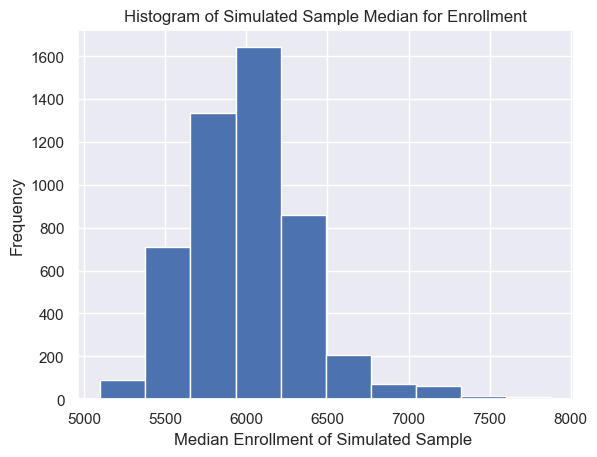

In [29]:
H0_sampling_dist['x'].hist()
plt.xlabel('Median Enrollment of Simulated Sample ')
plt.ylabel('Frequency')
plt.title('Histogram of Simulated Sample Median for Enrollment')

In [31]:
p_value = (H0_sampling_dist['x'] < 1542).mean()
print(f"p-value: {p_value}")

p-value: 0.0


## Case Study: Kitchen Prep Time

The `food_prep.csv` file contains information about how much time a sample of American adults spent preparing food and drink (in minutes) in the last 24 hours.  The data has already been cleaned, so you don't need to worry about cleaning the data before analyzing it.

## 3. A Confidence Interval [1 point]

Read in the `food_prep.csv` file.  Then, generate a sampling distribution for the **median** time spent preparing food and drink by all American adults.  Finally, find the 95% confidence interval using your sampling distribution.

In [32]:
df_1 = pd.read_csv('food_prep.csv')
df_1

,food_prep
0,15
1,2
2,60
3,45
4,0
...,...
395,60
396,0
397,0
398,0


In [35]:
ori_median = df_1['food_prep'].median()
ori_median

15.0

In [ ]:
sample_size = len(df_1)

sample_medians = []

for i in range(5000):
    df_1sample = df_1['food_prep'].sample(sample_size, replace=True)
    
    df_1median = df_1sample.median()
    
    sample_medians.append(df_1median)
    
food_prep_sampling = pd.DataFrame({'x': sample_medians})
food_prep_sampling

,x
0,10.0
1,15.0
2,15.0
3,15.0
4,15.0
...,...
4995,10.0
4996,10.0
4997,10.0
4998,10.0


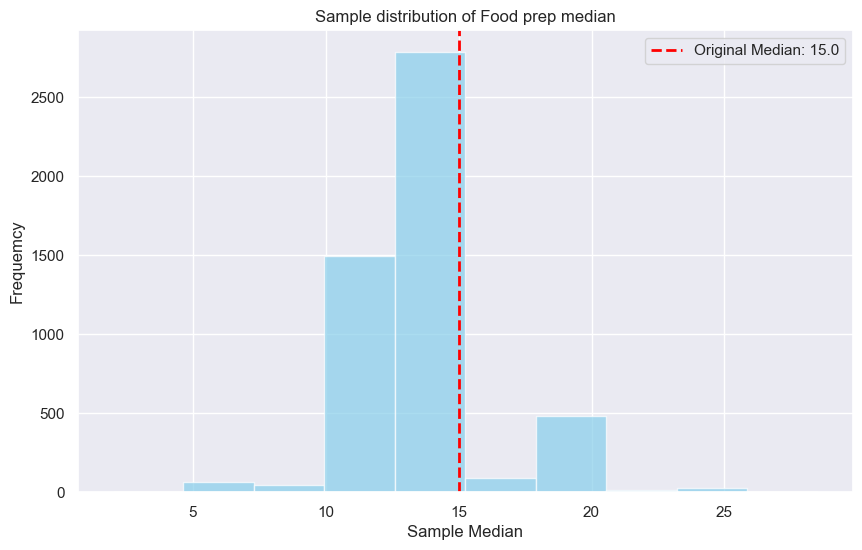

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(food_prep_sampling, bins=10, alpha=0.7, color='skyblue')
plt.axvline(x=ori_median, color='red', linestyle='--', linewidth=2, 
            label=f'Original Median: {ori_median}')
plt.xlabel('Sample Median')
plt.ylabel('Frequemcy')
plt.title('Sample distribution of Food prep median')
plt.legend()

In [43]:
food_prep_sampling['x'].describe()

count    5000.000000
mean       14.016700
std         3.271821
min         2.000000
25%        10.000000
50%        15.000000
75%        15.000000
max        28.500000
Name: x, dtype: float64

In [49]:
import numpy as np

lower_bound = np.percentile(sample_medians, 2.5)
upper_bound = np.percentile(sample_medians, 97.5)
print(f"95% confidence interval: ({lower_bound}, {upper_bound})")

95% confidence interval: (10.0, 20.0)


## 4. Student Midterm Survey [1 point]

Complete the student midterm survey on Canvas to earn the last point for Homework 5.

Remember to keep all your cells and hit the save icon above periodically to checkpoint (save) your results on your local computer. Once you are satisified with your results restart the kernel and run all (Kernel -> Restart & Run All). **Make sure nothing has changed**. Checkpoint and exit (File -> Save and Checkpoint + File -> Close and Halt). Follow the instructions on the Homework 5 Canvas Assignment to submit your notebook to GitHub.